#### import all packages

In [4]:
import os
import json
import csv
import pandas as pd
import re

#### get ground truth labels

In [5]:
# assign veremi directory
directory = '/Users/Opeyemi/Desktop/Secure_Auto_ECE599/MP_HW/MP3-contest-V2X/VeReMi_training_set'

# get all vehicle attack types
ground_truth = {'attackers':[], 'normal':[]}

# iterate over files in the directory
for filename in os.listdir(directory):
    parts = re.split('-', filename)
    third_str = parts[2].strip("A.json")
    if int(third_str) == 0:
        ground_truth['normal'].append(int(parts[1]))
    elif int(third_str)  != 0:
        ground_truth['attackers'].append(int(parts[1]))

#### data extraction for training & test datasets

In [33]:
file_list = []
directory = '/Users/Opeyemi/Desktop/Secure_Auto_ECE599/MP_HW/MP3-contest-V2X/VeReMi_test_set'
for filename in os.listdir(directory):
    file_dir =  "/Users/Opeyemi/Desktop/Secure_Auto_ECE599/MP_HW/MP3-contest-V2X/VeReMi_test_set/" + str(filename)
    file_list.append(file_dir)

new_file_list = []

    #for training data extraction
# dictionary = {'type':[], 'rcvTime': [], 'sendTime':[], 'sender': [], 'messageID': [], 
#               'pos_x':[], 'pos_y':[], 'pos_noise_x':[], 'pos_noise_y':[], 'spd_x': [], 
#               'spd_y': [],  'spd_noise_x':[], 'spd_noise_y':[], 'acl_x': [], 'acl_y': [],
#               'acl_noise_x': [], 'acl_noise_y': [], 'hed_x': [], 'hed_y': [], 'hed_noise_x':[],
#               'hed_noise_y':[], 'label': []}

    #for test data extraction
dictionary = {'type':[], 'rcvTime': [], 'sendTime':[], 'sender': [], 'messageID': [], 
              'pos_x':[], 'pos_y':[], 'pos_noise_x':[], 'pos_noise_y':[], 'spd_x': [], 
              'spd_y': [],  'spd_noise_x':[], 'spd_noise_y':[], 'acl_x': [], 'acl_y': [],
              'acl_noise_x': [], 'acl_noise_y': [], 'hed_x': [], 'hed_y': [], 'hed_noise_x':[],
              'hed_noise_y':[]}

for file in file_list:
    file_in = open(file,'r')
    file_lines = file_in.readlines()
    for json_file in file_lines:
        b = json_file.split("{\"type\":")
        for item in b:
            if item:
                new_file_list.append(str("{\"type\":"+item))
    
    data_dict = []        
    for item in new_file_list:
        data = json.loads(item)
        data_dict.append(data)
    
    for itemize in data_dict:
        if(itemize['type']==2):
            pass
#             dictionary['type'].append(itemize['type'])
#             dictionary['rcvTime'].append(itemize['rcvTime'])
#             dictionary['sendTime'].append(0)
#             dictionary['sender'].append(0)
#             dictionary['messageID'].append(0)
#             dictionary['label'].append(0)  ##uncomment for training datasets
#             dictionary['pos_x'].append(itemize['pos'][0])
#             dictionary['pos_y'].append(itemize['pos'][1])
#             dictionary['pos_noise_x'].append(itemize['pos_noise'][0])
#             dictionary['pos_noise_y'].append(itemize['pos_noise'][1])
#             dictionary['spd_x'].append(itemize['spd'][0])
#             dictionary['spd_y'].append(itemize['spd'][1])
#             dictionary['spd_noise_x'].append(itemize['spd_noise'][0])
#             dictionary['spd_noise_y'].append(itemize['spd_noise'][1])
#             dictionary['acl_x'].append(itemize['acl'][0])
#             dictionary['acl_y'].append(itemize['acl'][1])
#             dictionary['acl_noise_x'].append(itemize['acl_noise'][0])
#             dictionary['acl_noise_y'].append(itemize['acl_noise'][1])
#             dictionary['hed_x'].append(itemize['hed'][0])
#             dictionary['hed_y'].append(itemize['hed'][1])
#             dictionary['hed_noise_x'].append(itemize['hed_noise'][0])
#             dictionary['hed_noise_y'].append(itemize['hed_noise'][1])
            
                        
        elif(itemize['type']==3):
            dictionary['type'].append(itemize['type'])
            dictionary['rcvTime'].append(itemize['rcvTime'])
            dictionary['sendTime'].append(itemize['sendTime'])
            dictionary['sender'].append(itemize['sender'])
            dictionary['messageID'].append(itemize['messageID'])
            dictionary['pos_x'].append(itemize['pos'][0])
            dictionary['pos_y'].append(itemize['pos'][1])
            dictionary['pos_noise_x'].append(itemize['pos_noise'][0])
            dictionary['pos_noise_y'].append(itemize['pos_noise'][1])
            dictionary['spd_x'].append(itemize['spd'][0])
            dictionary['spd_y'].append(itemize['spd'][1])
            dictionary['spd_noise_x'].append(itemize['spd_noise'][0])
            dictionary['spd_noise_y'].append(itemize['spd_noise'][1])
            dictionary['acl_x'].append(itemize['acl'][0])
            dictionary['acl_y'].append(itemize['acl'][1])
            dictionary['acl_noise_x'].append(itemize['acl_noise'][0])
            dictionary['acl_noise_y'].append(itemize['acl_noise'][1])
            dictionary['hed_x'].append(itemize['hed'][0])
            dictionary['hed_y'].append(itemize['hed'][1])
            dictionary['hed_noise_x'].append(itemize['hed_noise'][0])
            dictionary['hed_noise_y'].append(itemize['hed_noise'][1])
            
            ##uncomment for training datasets
#             if itemize['sender'] in ground_truth['attackers']:   
#                 dictionary['label'].append(1)
#             elif itemize['sender'] in ground_truth['normal']:
#                 dictionary['label'].append(0)
        
        
    new_file_list.clear()
    data_dict.clear()
    

df = pd.DataFrame(dictionary)
df.to_csv('testing_data.csv', index=False)
    

#### read in the training dataset

In [6]:
read = pd.read_csv('/Users/Opeyemi/Desktop/Secure_Auto_ECE599/MP_HW/training_data.csv')

In [7]:
read.shape

(4695795, 22)

In [8]:
read

,type,rcvTime,sendTime,sender,messageID,pos_x,pos_y,pos_noise_x,pos_noise_y,spd_x,...,spd_noise_y,acl_x,acl_y,acl_noise_x,acl_noise_y,hed_x,hed_y,hed_noise_x,hed_noise_y,label
0,3,24902.177338,24902.177338,6282,16859490,153.631000,901.498705,3.006184,3.085705,0.057179,...,-5.925723e-03,-0.051949,0.701019,4.420072e-04,5.960614e-03,-0.000874,-1.000000,8.977733,9.748741,0
1,3,24902.363124,24902.363124,6238,16860636,131.193115,886.349327,3.742334,3.721263,-7.243460,...,-1.766351e-03,4.487658,0.337253,4.517968e-03,4.305957e-04,-0.972848,0.231444,32.825342,16.795064,0
2,3,24902.430649,24902.430649,6292,16861406,142.516325,956.208205,3.816335,3.677395,1.176883,...,2.713546e-02,-0.049455,0.668839,1.195901e-05,1.610854e-04,0.047814,-0.998856,14.526789,79.943661,0
3,3,24902.659224,24902.659224,6297,16864278,150.606615,931.842937,3.368974,3.264453,0.042362,...,-0.000000e+00,0.207464,-2.796991,2.124597e-03,2.124597e-03,0.071074,-0.997471,14.514750,15.433341,0
4,3,24902.962659,24902.962659,6293,16866880,132.277985,966.624885,3.633423,3.643670,-0.957886,...,-1.821052e-02,-0.017740,0.245176,7.724623e-06,1.043900e-04,-0.062836,0.998024,8.065810,2.011839,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695790,3,27278.690166,27278.690166,1013,36284452,146.942873,898.689335,4.754023,4.651908,0.201501,...,7.284552e-03,-0.146520,2.950374,2.176258e-04,2.937272e-03,0.020616,-0.999787,9.058925,13.863561,1
4695791,3,27278.761387,27278.761387,982,36284841,143.050415,691.732655,4.403055,4.880519,0.141298,...,3.085843e-07,1.781324,0.123572,1.190325e-11,1.190325e-11,-0.821814,-0.187632,11.694996,11.694996,1
4695792,3,27278.850301,27278.850301,964,36285444,160.665357,888.659299,3.693708,3.809228,0.002168,...,-2.697490e-06,0.000815,0.000815,0.000000e+00,0.000000e+00,-0.993781,-0.111353,1.230074,1.230074,0
4695793,3,27278.927853,27278.927853,986,36285775,198.280573,894.015220,4.170410,4.420227,-7.139299,...,-2.069810e-03,2.158095,0.288321,6.266844e-03,1.073104e-02,-0.993188,0.116524,33.910844,18.259398,0


In [9]:
read = read[['type', 'messageID', 'sender', 'sendTime', 'rcvTime', 'pos_x', 'pos_y', 
                   'pos_noise_x', 'pos_noise_y', 'spd_x', 'spd_y', 'spd_noise_x', 'spd_noise_y', 
                    'acl_x', 'acl_y', 'acl_noise_x', 'acl_noise_y', 'hed_x', 
                   'hed_y', 'hed_noise_x', 'hed_noise_y', 'label']]

In [10]:
read.label.value_counts()

0    3183484
1    1512311
Name: label, dtype: int64

#### train a simple tree-based ML classifier on the training dataset and evaluate the performance

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

#### Preprocessing (normalization and padding values)

In [13]:
# Min-max normalization
numeric_features = read.dtypes[read.dtypes != 'object'].index
read[numeric_features] = read[numeric_features].apply(lambda x: (x-x.min()) / (x.max()-x.min()))
# Fill empty values with 0
read = read.fillna(0)

#### Split train and validation sets

In [14]:
labelencoder = LabelEncoder()
read.iloc[:, -1] = labelencoder.fit_transform(read.iloc[:, -1])

In [15]:
X = read.drop(['label'], axis=1).values
y = read.iloc[:, -1].values.reshape(-1,1)
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0, stratify=y)

In [16]:
X_train.shape

(3756636, 21)

In [17]:
pd.Series(y_train).value_counts()

0    2546787
1    1209849
dtype: int64

#### Machine Learning model training
##### Training four base learners : decision tree, random forest, extra trees, XGBoost

Accuracy of DT: 0.9977021995210609
Precision of DT:0.9977018211305257
Recall of DT: 0.9977021995210609
F1-score of DT: 0.9977017640916803
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    636697
           1       1.00      1.00      1.00    302462

    accuracy                           1.00    939159
   macro avg       1.00      1.00      1.00    939159
weighted avg       1.00      1.00      1.00    939159



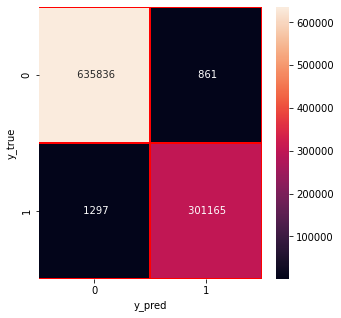

In [19]:
# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0, max_depth=50)
dt.fit(X_train, y_train)
dt_score=dt.score(X_test, y_test)
y_predict = dt.predict(X_test)
y_true = y_test
print('Accuracy of DT: '+str(dt_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT:' +(str(precision)))
print('Recall of DT: ' +(str(recall)))
print('F1-score of DT: ' +(str(fscore)))
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=" .0f", ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

In [20]:
dt_train = dt.predict(X_train)
dt_test = dt.predict(X_test)

In [21]:
dt_test

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [22]:
y_test

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

Accuracy of RF: 0.9988425815011089
Precision of RF: 0.9988429096277117
Recall of RF: 0.9988425815011089
F1-score of RF: 0.9988422799859231
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    636697
           1       1.00      1.00      1.00    302462

    accuracy                           1.00    939159
   macro avg       1.00      1.00      1.00    939159
weighted avg       1.00      1.00      1.00    939159



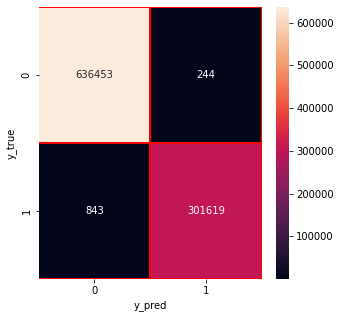

In [23]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0, n_jobs=-1)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: ' +(str(rf_score)))
precision,recall,fscore,none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true,y_predict)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.5,linecolor="red",fmt='.0f',ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [24]:
rf_train = rf.predict(X_train)
rf_test = rf.predict(X_test)

Accuracy of ET: 0.9989405414844558
Precision of ET: 0.9989407415071827
Recall of ET: 0.9989405414844558
F1-score of ET: 0.9989403079613961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    636697
           1       1.00      1.00      1.00    302462

    accuracy                           1.00    939159
   macro avg       1.00      1.00      1.00    939159
weighted avg       1.00      1.00      1.00    939159



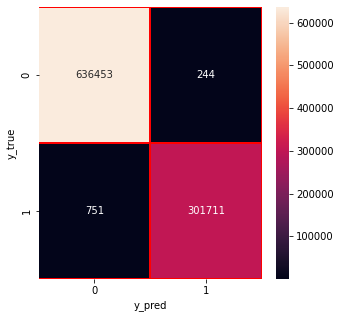

In [25]:
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state=0, n_jobs=-1, max_depth=50)
et.fit(X_train,y_train)
et_score = et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel('y_true')
plt.show()

In [26]:
et_train = rf.predict(X_train)
et_test = rf.predict(X_test)

[13:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost: 0.9978991842701822
Precision of XGBoost: 0.9979008162673211
Recall of XGBoost: 0.9978991842701822
F1-score of XGBoost: 0.997898066025531
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    636697
           1       1.00      0.99      1.00    302462

    accuracy                           1.00    939159
   macro avg       1.00      1.00      1.00    939159
weighted avg       1.00      1.00      1.00    939159



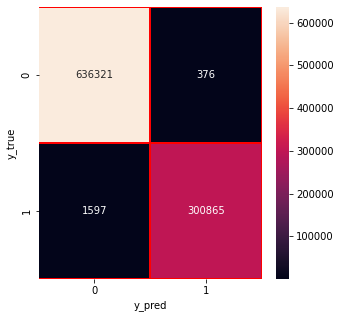

In [27]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators=10, n_jobs=-1, max_depth=50)
xg.fit(X_train,y_train)
xg_score = xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel('y_true')
plt.show()

In [28]:
xg_train = xg.predict(X_train)
xg_test = xg.predict(X_test)

#### Stacking model construction (ensemble for 4 base learners)

In [29]:
# Use the outputs of 4 base models to construct a new ensemble model
base_predictions_train = pd.DataFrame({
    'DecisionTree': dt_train.ravel(),
    'RandomForest': rf_train.ravel(),
    'ExtraTrees': et_train.ravel(),
    'XGBoost': xg_train.ravel(),
})
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XGBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,1,1
4,0,0,0,0


In [30]:
dt_train=dt_train.reshape(-1,1)
et_train=et_train.reshape(-1,1)
rf_train=rf_train.reshape(-1,1)
xg_train=xg_train.reshape(-1,1)
dt_test=dt_test.reshape(-1,1)
et_test=et_test.reshape(-1,1)
rf_test=rf_test.reshape(-1,1)
xg_test=xg_test.reshape(-1,1)

In [31]:
x_train= np.concatenate((dt_train, et_train, rf_train, xg_train), axis=1)
x_test= np.concatenate((dt_test, et_test, rf_test, xg_test), axis=1)

In [32]:
stk = xgb.XGBClassifier().fit(x_train, y_train)

[13:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy of Stacking: 0.9988425815011089
Precision of Stacking: 0.9988429096277117
Recall of Stacking: 0.9988425815011089
F1-score of Stacking: 0.9988422799859231
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    636697
           1       1.00      1.00      1.00    302462

    accuracy                           1.00    939159
   macro avg       1.00      1.00      1.00    939159
weighted avg       1.00      1.00      1.00    939159



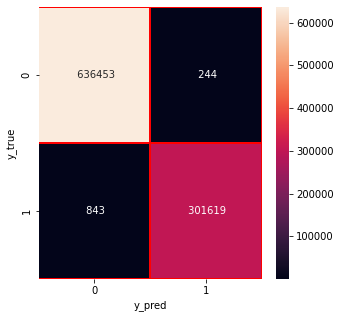

In [33]:
y_predict = stk.predict(x_test)
y_true = y_test
stk_score = accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+ (str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=" .0f", ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

### Feature Selection

#### Feature importance

In [34]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

In [35]:
dt_feature

array([0.        , 0.02302516, 0.15617894, 0.0269275 , 0.02270032,
       0.11329875, 0.07260089, 0.01890235, 0.02110451, 0.12486062,
       0.15999379, 0.02853683, 0.0284909 , 0.01138609, 0.01172584,
       0.00967025, 0.01177984, 0.0510686 , 0.0302374 , 0.04730301,
       0.03020841])

In [36]:
# Calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature +xgb_feature)/4

In [37]:
feature=(read.drop(['label'],axis=1)).columns.values
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

Features sorted by their score:
[(0.1541, 'spd_y'), (0.1296, 'spd_x'), (0.0926, 'sender'), (0.0846, 'pos_x'), (0.0688, 'pos_y'), (0.0562, 'hed_x'), (0.0478, 'hed_y'), (0.0442, 'hed_noise_x'), (0.0364, 'hed_noise_y'), (0.0361, 'messageID'), (0.0331, 'sendTime'), (0.0325, 'spd_noise_y'), (0.0316, 'rcvTime'), (0.0313, 'spd_noise_x'), (0.0264, 'pos_noise_y'), (0.025, 'pos_noise_x'), (0.0195, 'acl_y'), (0.0185, 'acl_x'), (0.016, 'acl_noise_x'), (0.0157, 'acl_noise_y'), (0.0, 'type')]


In [38]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)

In [39]:
len(f_list)

21

In [40]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum= Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.6338:
        break

In [41]:
X_fs = read[fs].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, train_size=0.8, test_size=0.2, random_state=0, stratify=y)

In [43]:
X_train.shape

(3756636, 8)

In [44]:
pd.Series(y_train).value_counts()

0    2546787
1    1209849
dtype: int64

#### Machine learning model training after feature selection

Accuracy of DT: 0.9986477263168431
Precision of DT:0.9988429096277117
Recall of DT: 0.9988425815011089
F1-score of DT: 0.9988422799859231
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    636697
           1       1.00      1.00      1.00    302462

    accuracy                           1.00    939159
   macro avg       1.00      1.00      1.00    939159
weighted avg       1.00      1.00      1.00    939159



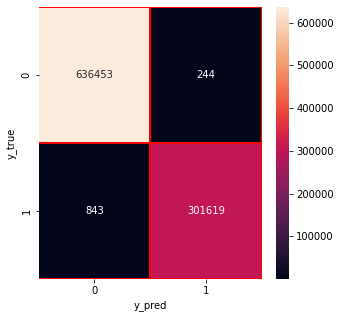

In [45]:
# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)
dt_score=dt.score(X_test, y_test)
y_pred=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+str(dt_score))
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT:' +(str(precision)))
print('Recall of DT: ' +(str(recall)))
print('F1-score of DT: ' +(str(fscore)))
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel('y_true')
plt.show()

In [46]:
dt_train = dt.predict(X_train)
dt_test = dt.predict(X_test)

Accuracy of RF: 0.9986711515302521
Precision of RF: 0.9986717660521514
Recall of RF: 0.9986711515302521
F1-score of RF: 0.9986707131985552
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    636697
           1       1.00      1.00      1.00    302462

    accuracy                           1.00    939159
   macro avg       1.00      1.00      1.00    939159
weighted avg       1.00      1.00      1.00    939159



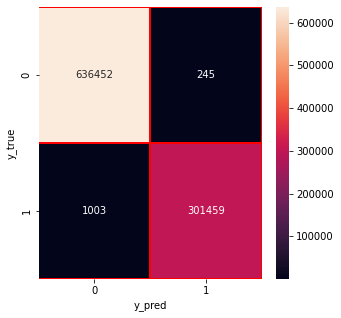

In [47]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0, n_jobs=-1, max_depth=50)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: ' +(str(rf_score)))
precision,recall,fscore,none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true, y_predict))
cm = confusion_matrix(y_true,y_predict)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.5,linecolor="red",fmt='.0f',ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [48]:
rf_train = dt.predict(X_train)
rf_test = dt.predict(X_test)

Accuracy of ET: 0.9987605932541774
Precision of ET: 0.9987608565514389
Recall of ET: 0.9987605932541774
F1-score of ET: 0.9987602763231873
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    636697
           1       1.00      1.00      1.00    302462

    accuracy                           1.00    939159
   macro avg       1.00      1.00      1.00    939159
weighted avg       1.00      1.00      1.00    939159



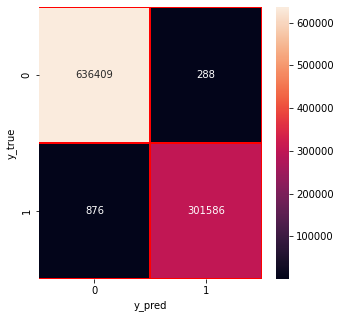

In [49]:
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state=0, n_jobs=-1, max_depth=50)
et.fit(X_train,y_train)
et_score = et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel('y_true')
plt.show()

In [50]:
et_train = rf.predict(X_train)
et_test = rf.predict(X_test)

[13:32:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost: 0.9977746047261433
Precision of XGBoost: 0.9977764094605532
Recall of XGBoost: 0.9977746047261433
F1-score of XGBoost: 0.9977733548460964
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    636697
           1       1.00      0.99      1.00    302462

    accuracy                           1.00    939159
   macro avg       1.00      1.00      1.00    939159
weighted avg       1.00      1.00      1.00    939159



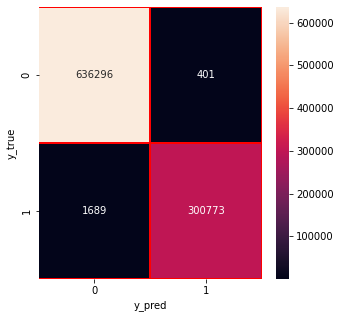

In [51]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators=10, n_jobs=-1, max_depth=50)
xg.fit(X_train,y_train)
xg_score = xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel('y_true')
plt.show()

In [52]:
xg_train = xg.predict(X_train)
xg_test = xg.predict(X_test)

#### Stacking model construction

In [53]:
base_predictions_train = pd.DataFrame({
    'DecisionTree': dt_train.ravel(),
    'RandomForest': rf_train.ravel(),
    'ExtraTrees': et_train.ravel(),
    'XGBoost': xg_train.ravel(),
})
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XGBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,1,1
4,0,0,0,0


In [54]:
dt_train=dt_train.reshape(-1,1)
et_train=et_train.reshape(-1,1)
rf_train=rf_train.reshape(-1,1)
xg_train=xg_train.reshape(-1,1)
dt_test=dt_test.reshape(-1,1)
et_test=et_test.reshape(-1,1)
rf_test=rf_test.reshape(-1,1)
xg_test=xg_test.reshape(-1,1)

In [55]:
x_train= np.concatenate((dt_train, et_train, rf_train, xg_train), axis=1)
x_test= np.concatenate((dt_test, et_test, rf_test, xg_test), axis=1)

[13:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Stacking: 0.9986477263168431
Precision of Stacking: 0.9986478180771202
Recall of Stacking: 0.9986477263168431
F1-score of Stacking: 0.9986477662053544
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    636697
           1       1.00      1.00      1.00    302462

    accuracy                           1.00    939159
   macro avg       1.00      1.00      1.00    939159
weighted avg       1.00      1.00      1.00    939159



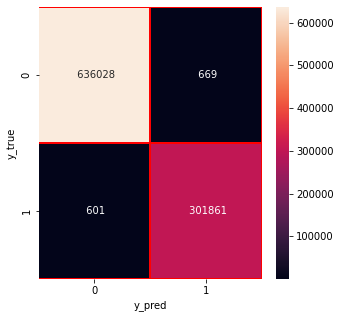

In [56]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict = stk.predict(x_test)
y_true = y_test
stk_score = accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+ (str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=" .0f", ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

#### read in the test dataset

In [57]:
test = pd.read_csv('/Users/Opeyemi/Desktop/Secure_Auto_ECE599/MP_HW/testing_data.csv')

In [58]:
test_dup = test

In [59]:
test.shape

(2908498, 21)

In [60]:
test= test[['type', 'messageID', 'sender', 'sendTime', 'rcvTime', 'pos_x', 'pos_y', 
                   'pos_noise_x', 'pos_noise_y', 'spd_x', 'spd_y', 'spd_noise_x', 'spd_noise_y', 
                    'acl_x', 'acl_y', 'acl_noise_x', 'acl_noise_y', 'hed_x', 
                   'hed_y', 'hed_noise_x', 'hed_noise_y']]

#### Preprocessing (normalization and padding values)

In [61]:
# Min-max normalization
numeric_features = test.dtypes[test.dtypes != 'object'].index
test[numeric_features] = test[numeric_features].apply(lambda x: (x-x.min()) / (x.max()-x.min()))
# Fill empty values with 0
test = test.fillna(0)

In [62]:
test_fs = test[fs].values

In [63]:
test_fs.shape

(2908498, 8)

In [64]:
test_labels = xg.predict(test_fs)

In [65]:
test_labels

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [66]:
test['label'] = test_labels

In [67]:
test.drop('messageID', axis=1, inplace=True)

In [68]:
test['messageID'] = test_dup['messageID']

In [69]:
test= test[['type', 'messageID', 'sender', 'sendTime', 'rcvTime', 'pos_x', 'pos_y', 
                   'pos_noise_x', 'pos_noise_y', 'spd_x', 'spd_y', 'spd_noise_x', 'spd_noise_y', 
                    'acl_x', 'acl_y', 'acl_noise_x', 'acl_noise_y', 'hed_x', 
                   'hed_y', 'hed_noise_x', 'hed_noise_y', 'label']]

In [70]:
results = test[['messageID', 'label']]

In [71]:
results = results.sort_values('messageID')

In [72]:
uniq = results['messageID'].unique()

In [73]:
results_3 = results

In [74]:
df = results_3.drop_duplicates(subset=['messageID'], keep='last')

In [75]:
df

,messageID,label
1325225,139624065,1
0,139624871,1
452,139635306,1
2197166,139636223,1
2652855,139636569,0
...,...,...
2613813,224155327,0
2613814,224156120,0
2614931,224156455,0
2613815,224159133,0


In [76]:
df.to_csv('test_results.csv', encoding='utf-8', index=False)